# SQL - Relational database with Python

#### Imports

In [6]:
from IPython.display import Image
import mysql.connector
from mysql.connector import Error
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Level 1

### Exercise 1

#### Create relational database and access with Python

I will work with a database which contains group of enterprises entities according to this diagram from MySQL Workbench. This database is imaginary case study created to practice database composing.

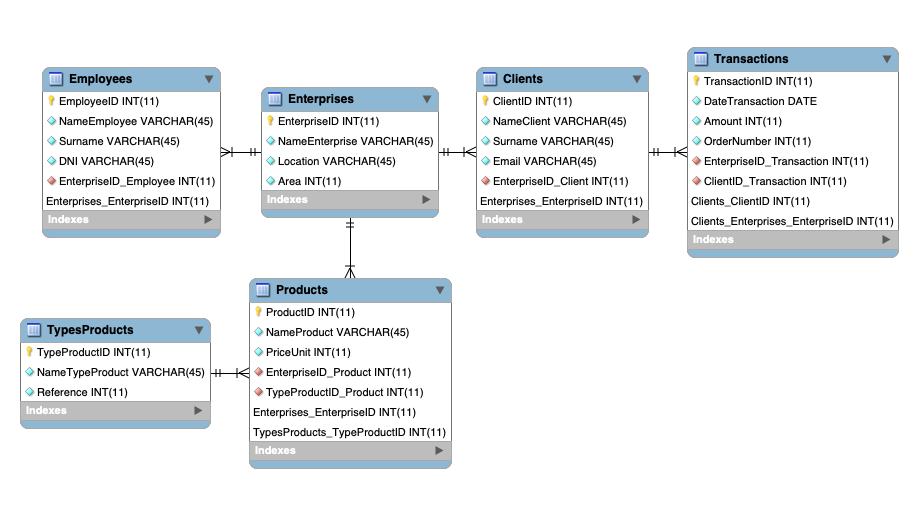

In [8]:
Image(filename='mydatabase3.jpg')

##### Tables:
- table of enterprises
- table of employees
- table of clients
- table of products
- table of types of products
- table of transactions

##### Relations:
- 1:N One enterprise has many employees
- 1:N One enterprise has many clients
- N:M Multiple enterprises has multiple products - join table Products
    - 1:N One enterprise has many products
    - 1:N One type of product has many products
- 1:N One enterprise has many transactions
- 1:N One client has relation with many transactions

In [10]:
#connecting to MySQL locally
db = mysql.connector.connect(
     host="localhost",
     user="root",
     password="AnticRoca32")

print(db)

In [11]:
#creating a database
mycursor = db.cursor()
mycursor.execute("DROP DATABASE IF EXISTS mydatabase1")
mycursor.execute("CREATE DATABASE mydatabase1")
mycursor.execute("SHOW DATABASES")
for x in mycursor:
    print(x)

('information_schema',)
('mydatabase1',)
('mydatabase2',)
('mysql',)
('performance_schema',)
('sys',)


In [12]:
#connecting to new database abnd creating tables
mycursor.execute("USE mydatabase1")
mycursor.execute("""CREATE TABLE Enterprises 
                (EnterpriseID INT AUTO_INCREMENT PRIMARY KEY, 
                NameEnterprise VARCHAR(255), 
                Location VARCHAR(255), 
                Area INT)""")

mycursor.execute("""CREATE TABLE Employees 
                (EmployeeID INT AUTO_INCREMENT PRIMARY KEY, 
                NameEmployee VARCHAR(255), 
                Surname VARCHAR(255), 
                DNI VARCHAR(255),
                EnterpriseID INT)""")

mycursor.execute("""CREATE TABLE TypesProducts 
                (TypeProductID INT AUTO_INCREMENT PRIMARY KEY,  
                NameTypeProduct VARCHAR(255),
                Reference INT)""")

mycursor.execute("""CREATE TABLE Products 
                (ProductID INT AUTO_INCREMENT PRIMARY KEY,
                NameProduct VARCHAR(255),
                PriceUnit INT,
                EnterpriseID INT,
                TypeProductID INT)""")

mycursor.execute("""CREATE TABLE Clients 
                (ClientID INT AUTO_INCREMENT PRIMARY KEY,
                NameClient VARCHAR(255), 
                Surname VARCHAR(255), 
                Email VARCHAR(255),
                EnterpriseID INT)""")

mycursor.execute("""CREATE TABLE Transactions 
                (TransactionID INT AUTO_INCREMENT PRIMARY KEY,
                DateTransaction DATE,
                Amount INT,
                OrderNumber INT,
                EnterpriseID INT,
                ClientID INT)""")

mycursor.execute("SHOW TABLES")
for x in mycursor:
    print(x)

('Clients',)
('Employees',)
('Enterprises',)
('Products',)
('Transactions',)
('TypesProducts',)


In [13]:
#foreign keys
mycursor.execute("USE mydatabase1")
mycursor.execute("""ALTER TABLE Employees ADD FOREIGN KEY (EnterpriseID) REFERENCES Enterprises(EnterpriseID)""")
mycursor.execute("""ALTER TABLE Products ADD FOREIGN KEY (EnterpriseID) REFERENCES Enterprises(EnterpriseID)""")
mycursor.execute("""ALTER TABLE Products ADD FOREIGN KEY (TypeProductID) REFERENCES TypesProducts(TypeProductID)""")
mycursor.execute("""ALTER TABLE Clients ADD FOREIGN KEY (EnterpriseID) REFERENCES Enterprises(EnterpriseID)""")
mycursor.execute("""ALTER TABLE Transactions ADD FOREIGN KEY (EnterpriseID) REFERENCES Enterprises(EnterpriseID)""")
mycursor.execute("""ALTER TABLE Transactions ADD FOREIGN KEY (ClientID) REFERENCES Clients(ClientID)""")

In [14]:
#inserting values to table Enterprises
sql = "INSERT INTO Enterprises (NameEnterprise, Location, Area) VALUES (%s, %s, %s)"
val = [("Girona shop", "C/ Emili Grahit 10", "600"),
      ("Barcelona shop", "C/ Pau Claris 20", "1600"),
      ("Palamos shop", "C/ President Macià 30", "400")]
mycursor.executemany(sql, val)
db.commit()
print(mycursor.rowcount, "record inserted")

3 record inserted


In [15]:
#print all values from table Enterprises
mycursor.execute("SELECT * FROM Enterprises")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'Girona shop', 'C/ Emili Grahit 10', 600)
(2, 'Barcelona shop', 'C/ Pau Claris 20', 1600)
(3, 'Palamos shop', 'C/ President Macià 30', 400)


In [16]:
#inserting values to table Employees             
sql = "INSERT INTO Employees (NameEmployee, Surname, DNI, EnterpriseID) VALUES (%s, %s, %s, %s)"
val = [("Maria","Garcia Martinez","99999999K","1"),
      ("Irene","Lopez Martin","88888888K","2"),
      ("Carles","Diaz Romero","77777777K","3")]
mycursor.executemany(sql, val)
db.commit()
print(mycursor.rowcount, "record inserted")

3 record inserted


In [17]:
#print all values from table Employees
mycursor.execute("SELECT * FROM Employees")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'Maria', 'Garcia Martinez', '99999999K', 1)
(2, 'Irene', 'Lopez Martin', '88888888K', 2)
(3, 'Carles', 'Diaz Romero', '77777777K', 3)


In [18]:
#inserting values to table TypesProducts             
sql = "INSERT INTO TypesProducts (NameTypeProduct, Reference) VALUES (%s, %s)"
val = [("Table","5513"),
       ("Chair","5425"),
       ("Lighting","5356"),
       ("Beds","5895"),
       ("Decoration","5813"),
       ("Sofa","5516")]

mycursor.executemany(sql, val)
db.commit()
print(mycursor.rowcount, "record inserted")

6 record inserted


In [19]:
#print all values from table TypesProducts
mycursor.execute("SELECT * FROM TypesProducts")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'Table', 5513)
(2, 'Chair', 5425)
(3, 'Lighting', 5356)
(4, 'Beds', 5895)
(5, 'Decoration', 5813)
(6, 'Sofa', 5516)


In [20]:
#inserting values to table Clients           
sql = "INSERT INTO Clients (NameClient, Surname, Email, EnterpriseID) VALUES (%s, %s, %s, %s)"
val = [("Lorena","Garcia Martinez","Lorena@gmail.com","3"),
      ("Jaume","Lopez Martin","Jaume@gmail.com","1"),
      ("Rafael","Diaz Romero","Rafael@gmail.com","2"),
      ("Imma","Torres Gil","Imma@gmail.com","1"),
      ("Monica","Jimenez Diaz","Monica@gmail.com","2"),
      ("Alex","Serrano Navarro","Alex@gmail.com","3")]
mycursor.executemany(sql, val)
db.commit()
print(mycursor.rowcount, "record inserted")

6 record inserted


In [21]:
#print all values from table Clients
mycursor.execute("SELECT * FROM Clients")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'Lorena', 'Garcia Martinez', 'Lorena@gmail.com', 3)
(2, 'Jaume', 'Lopez Martin', 'Jaume@gmail.com', 1)
(3, 'Rafael', 'Diaz Romero', 'Rafael@gmail.com', 2)
(4, 'Imma', 'Torres Gil', 'Imma@gmail.com', 1)
(5, 'Monica', 'Jimenez Diaz', 'Monica@gmail.com', 2)
(6, 'Alex', 'Serrano Navarro', 'Alex@gmail.com', 3)


In [22]:
#inserting values to table Transactions           
sql = "INSERT INTO Transactions (DateTransaction, Amount, OrderNumber, EnterpriseID, ClientID) VALUES (%s, %s, %s, %s, %s)"
val = [("2021-11-20","1200","202101","1","1"),
       ("2021-11-20","450","202102","2","1"),
       ("2021-11-20","1050","202103","3","1"),
       ("2021-11-20","800","202104","2","3"),
       ("2021-11-20","1000","202105","2","2"),
       ("2021-11-20","400","202101","1","3"),
       ("2021-11-20","800","202103","3","2")]

mycursor.executemany(sql, val)
db.commit()
print(mycursor.rowcount, "record inserted")

7 record inserted


In [23]:
#print all values from table Transactions
mycursor.execute("SELECT * FROM Transactions")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, datetime.date(2021, 11, 20), 1200, 202101, 1, 1)
(2, datetime.date(2021, 11, 20), 450, 202102, 2, 1)
(3, datetime.date(2021, 11, 20), 1050, 202103, 3, 1)
(4, datetime.date(2021, 11, 20), 800, 202104, 2, 3)
(5, datetime.date(2021, 11, 20), 1000, 202105, 2, 2)
(6, datetime.date(2021, 11, 20), 400, 202101, 1, 3)
(7, datetime.date(2021, 11, 20), 800, 202103, 3, 2)


In [24]:
#inserting values to table Products             
sql = "INSERT INTO Products (NameProduct, PriceUnit, EnterpriseID, TypeProductID) VALUES (%s, %s, %s, %s)"
val = [("TableSmall","250","1","1"),
       ("TableMedium","350","2","1"),
       ("TableBig","450","3","1"),
       ("Chair","650","2","2")]

mycursor.executemany(sql, val)
db.commit()
print(mycursor.rowcount, "record inserted")

4 record inserted


In [25]:
#print all values from table Products
mycursor.execute("SELECT * FROM Products")
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1, 'TableSmall', 250, 1, 1)
(2, 'TableMedium', 350, 2, 1)
(3, 'TableBig', 450, 3, 1)
(4, 'Chair', 650, 2, 2)


## Level 2

### Exercise 2

#### Queries and dataframes

In [26]:
#databes of all enterprises
try:
    db = mysql.connector.connect(host="localhost", database = 'mydatabase1',user="root", passwd="AnticRoca32",use_pure=True)
    query = "SELECT * FROM Enterprises;"
    enterprise_dataFrame = pd.read_sql(query,db)
except Exception as e:
    db.close()
    print(str(e))

In [27]:
enterprise_dataFrame

,EnterpriseID,NameEnterprise,Location,Area
0,1,Girona shop,C/ Emili Grahit 10,600
1,2,Barcelona shop,C/ Pau Claris 20,1600
2,3,Palamos shop,C/ President Macià 30,400


In [28]:
#databes of all products with name of shop where to find them
try:
    db = mysql.connector.connect(host="localhost", database = 'mydatabase1',user="root", passwd="AnticRoca32",use_pure=True)
    query = """SELECT Enterprises.NameEnterprise, Products.NameProduct, Products.PriceUnit 
    FROM Enterprises 
    INNER JOIN Products ON Enterprises.EnterpriseID = Products.EnterpriseID;"""
    products_dataFrame = pd.read_sql(query,db)
except Exception as e:
    db.close()
    print(str(e))

In [29]:
products_dataFrame

,NameEnterprise,NameProduct,PriceUnit
0,Girona shop,TableSmall,250
1,Barcelona shop,TableMedium,350
2,Barcelona shop,Chair,650
3,Palamos shop,TableBig,450


In [30]:
#inner join - transactions by each shop
try:
    db = mysql.connector.connect(host="localhost", database = 'mydatabase1',user="root", passwd="AnticRoca32",use_pure=True)
    query = """SELECT Enterprises.NameEnterprise, Enterprises.Location, Transactions.DateTransaction, Transactions.Amount
    FROM Enterprises
    INNER JOIN Transactions ON Enterprises.EnterpriseID=Transactions.EnterpriseID;"""
    transactions_dataFrame = pd.read_sql(query,db)
except Exception as e:
    db.close()
    print(str(e))

In [31]:
transactions_dataFrame

,NameEnterprise,Location,DateTransaction,Amount
0,Girona shop,C/ Emili Grahit 10,2021-11-20,1200
1,Girona shop,C/ Emili Grahit 10,2021-11-20,400
2,Barcelona shop,C/ Pau Claris 20,2021-11-20,450
3,Barcelona shop,C/ Pau Claris 20,2021-11-20,800
4,Barcelona shop,C/ Pau Claris 20,2021-11-20,1000
5,Palamos shop,C/ President Macià 30,2021-11-20,1050
6,Palamos shop,C/ President Macià 30,2021-11-20,800


In [32]:
#inner join - transactions by client
try:
    db = mysql.connector.connect(host="localhost", database = 'mydatabase1',user="root", passwd="AnticRoca32",use_pure=True)
    query = """SELECT Transactions.EnterpriseID, Transactions.DateTransaction, Transactions.Amount, Clients.ClientID 
    FROM Transactions
    INNER JOIN Clients ON Transactions.EnterpriseID=Clients.EnterpriseID;"""
    clientsTransactions_dataFrame = pd.read_sql(query,db)
except Exception as e:
    db.close()
    print(str(e))

In [33]:
clientsTransactions_dataFrame

,EnterpriseID,DateTransaction,Amount,ClientID
0,1,2021-11-20,1200,2
1,1,2021-11-20,1200,4
2,2,2021-11-20,450,3
3,2,2021-11-20,450,5
4,3,2021-11-20,1050,1
5,3,2021-11-20,1050,6
6,2,2021-11-20,800,3
7,2,2021-11-20,800,5
8,2,2021-11-20,1000,3
9,2,2021-11-20,1000,5


In [34]:
#group by - all clients from shop ID 1
try:
    db = mysql.connector.connect(host="localhost", database = 'mydatabase1',user="root", passwd="AnticRoca32",use_pure=True)
    query = """SELECT Clients.ClientID, Clients.NameClient, Clients.Email
    FROM Clients
    WHERE Clients.EnterpriseID = 1
    ORDER BY Clients.ClientID;"""
    clients_dataFrame = pd.read_sql(query,db)
except Exception as e:
    db.close()
    print(str(e))

In [35]:
clients_dataFrame

,ClientID,NameClient,Email
0,2,Jaume,Jaume@gmail.com
1,4,Imma,Imma@gmail.com


In [36]:
#databes of all employees
try:
    db = mysql.connector.connect(host="localhost", database = 'mydatabase1',user="root", passwd="AnticRoca32",use_pure=True)
    query = "SELECT * FROM Employees;"
    employees_dataFrame = pd.read_sql(query,db)
except Exception as e:
    db.close()
    print(str(e))

In [37]:
employees_dataFrame

,EmployeeID,NameEmployee,Surname,DNI,EnterpriseID
0,1,Maria,Garcia Martinez,99999999K,1
1,2,Irene,Lopez Martin,88888888K,2
2,3,Carles,Diaz Romero,77777777K,3


## Level 3

### Exercise 3

#### Data visualization

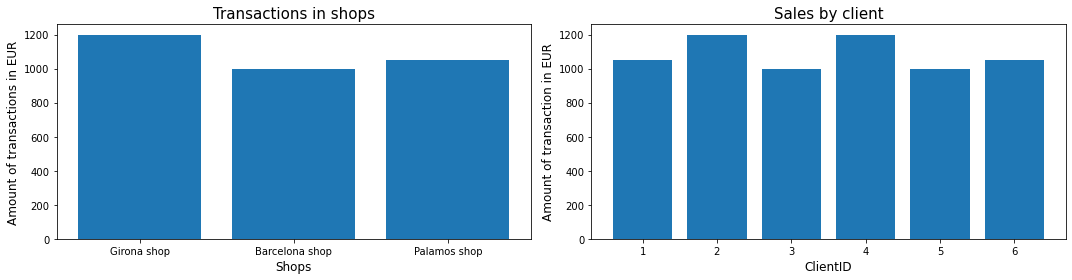

In [38]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))

axes[0].bar(transactions_dataFrame['NameEnterprise'],transactions_dataFrame['Amount'])
axes[0].set_xlabel("Shops",fontsize=12)
axes[0].set_ylabel("Amount of transactions in EUR",fontsize=12)
axes[0].set_title("Transactions in shops",fontsize=15)
axes[0].grid(False)

axes[1].bar(clientsTransactions_dataFrame['ClientID'],clientsTransactions_dataFrame['Amount'])
axes[1].set_xlabel("ClientID",fontsize=12)
axes[1].set_ylabel("Amount of transaction in EUR",fontsize=12)
axes[1].set_title("Sales by client",fontsize=15)
axes[1].grid(False)

plt.tight_layout();

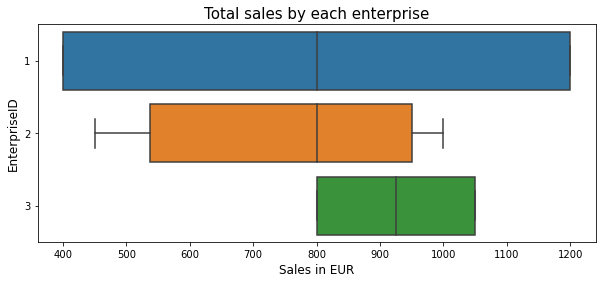

In [39]:
plt.figure(figsize =(10, 4))

ax = sns.boxplot(x=clientsTransactions_dataFrame["Amount"],y=clientsTransactions_dataFrame["EnterpriseID"],orient="h")
ax.grid(False)
plt.title('Total sales by each enterprise', fontsize = 15)
plt.xlabel('Sales in EUR',fontsize=12)
plt.ylabel('EnterpriseID',fontsize=12)
plt.show()

Observations:
- The average sale is higher in Palamos shop than in other shops.
- Clients with ID 2 and 4 are buying the most.
- Girona shop has the highest total of sales.

#### Notes
* Import data to DataFrame
    - https://medium.com/analytics-vidhya/importing-data-from-a-mysql-database-into-pandas-data-frame-a06e392d27d7